In [409]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings  
warnings.filterwarnings('ignore')

le = preprocessing.LabelEncoder()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [410]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

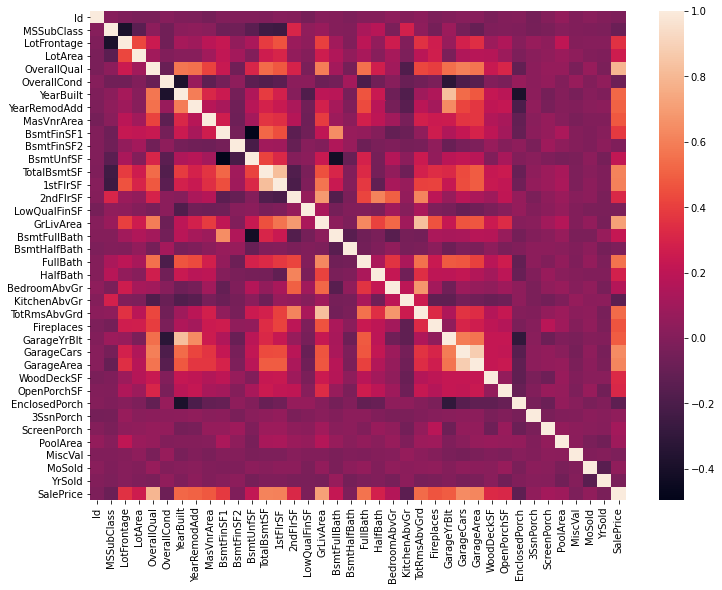

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [412]:
corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)
plt.show()
print(df.corr())

Find and drop variables that have very low impact on SalePrice:

In [413]:
corrmat = df.corr()
low_corrmat = corrmat[(corrmat['SalePrice'] > -0.2) & (corrmat['SalePrice'] < 0.5)]
low_corrmat.drop(['Id'], inplace=True)
low_corrmat_list = list(low_corrmat.index)
print(low_corrmat_list)
to_remove = ['OverallCond', 'MiscVal']
for el in to_remove:
    low_corrmat_list.remove(el)
df.drop(columns=low_corrmat_list, inplace=True)
df.info()

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1 

Find and drop variables that have high correlation and have similar meaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

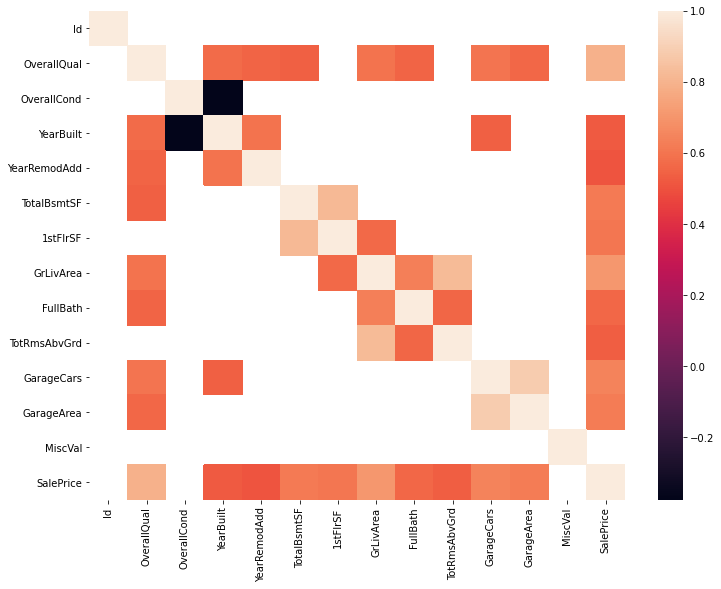

In [414]:
df.info()
corrmat = df.corr()
high_corrmat = corrmat[(corrmat < -0.2) | (corrmat > 0.5)]
print(high_corrmat)
plt.subplots(figsize=(12, 9))
sns.heatmap(high_corrmat)
#pairs being strongly correlated are: (1stFlrSF, TotalBsmtSF), (TotRmsAbvGrd, GrLivArea), (GarageArea, GarageCars) and it makes sense to drop one element from each pair
df.drop(columns=['TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea'], inplace=True)

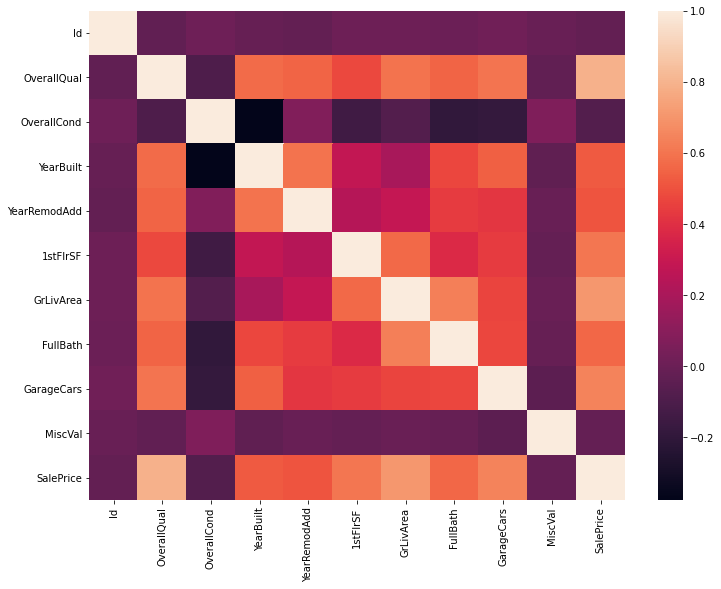

In [415]:
corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

It seems like these values are proper to predict SalePrice of no-known data, now it's time to deal with outliers.

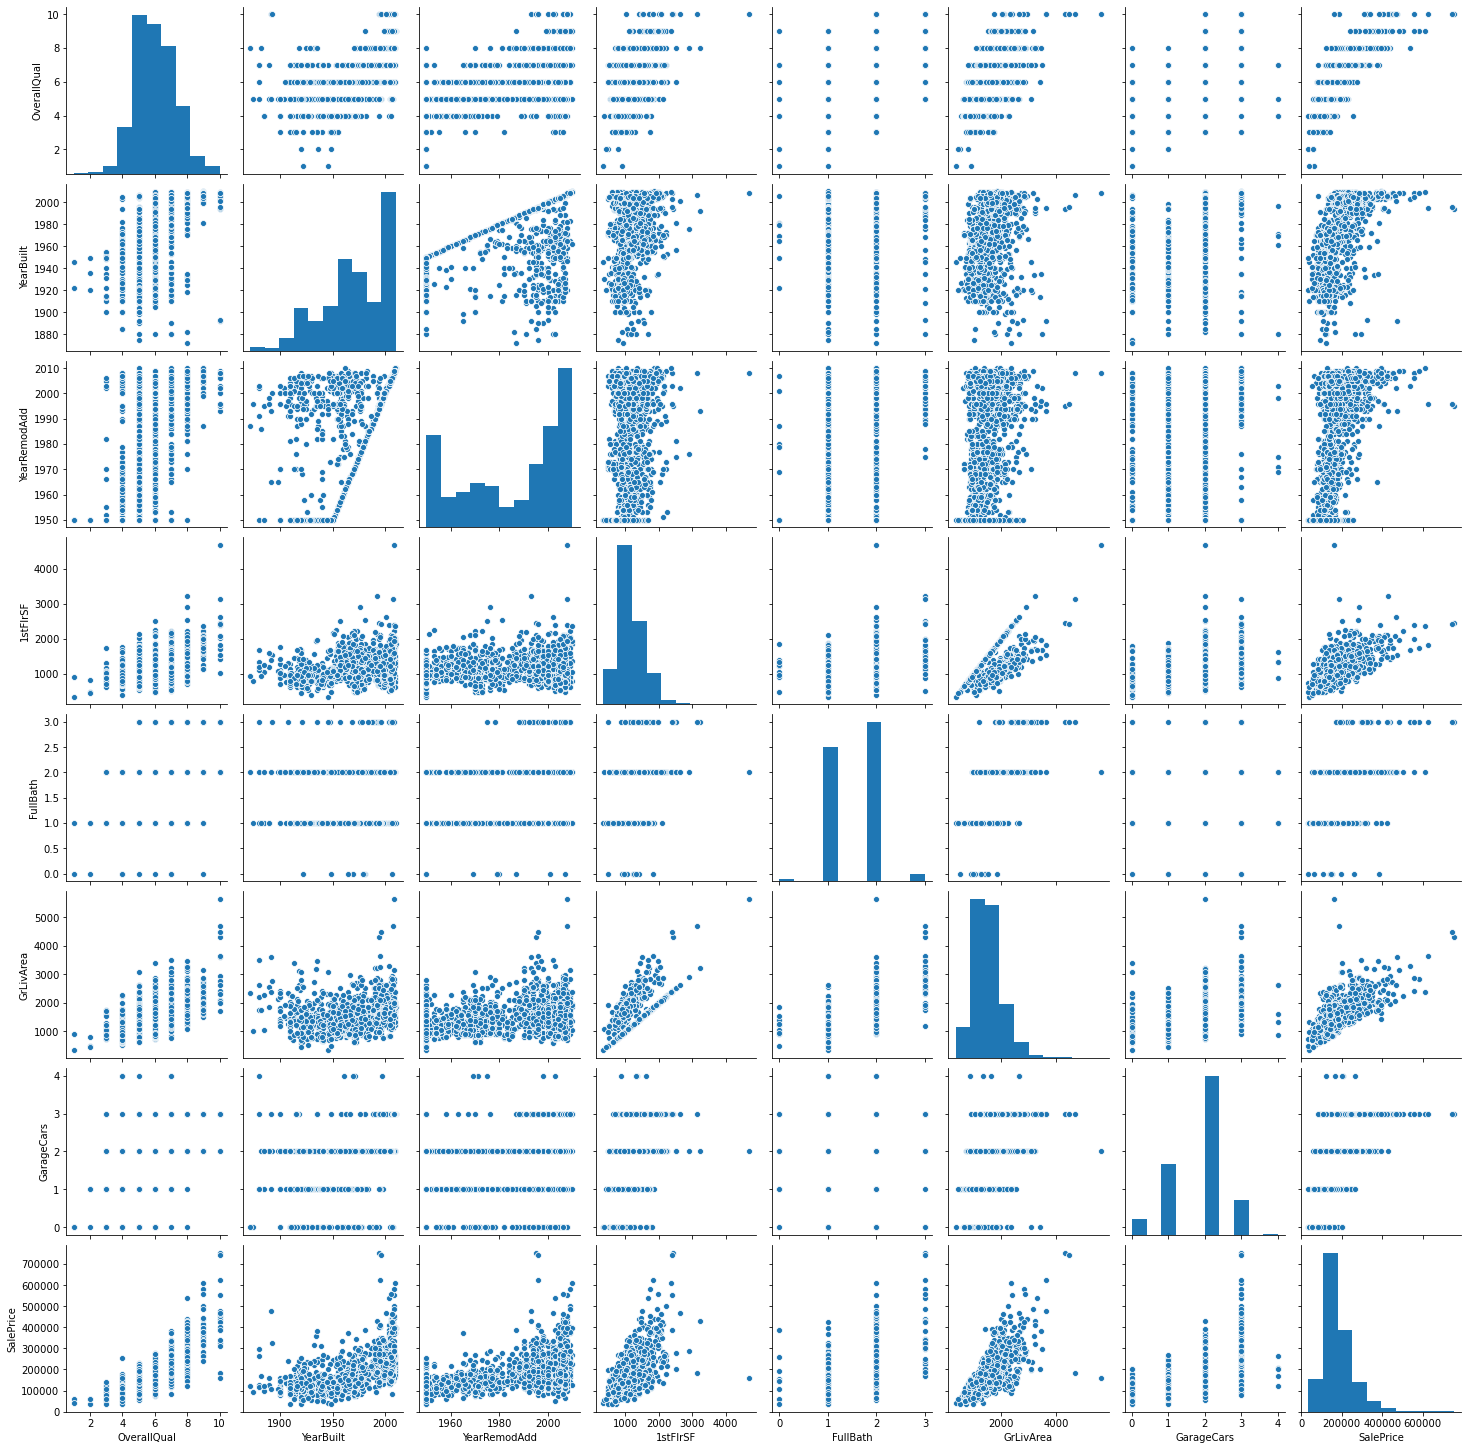

In [416]:
cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'FullBath', 'GrLivArea', 'GarageCars', 'SalePrice']
sns.pairplot(df[cols])
plt.show()

I decided to look closer to YearBuilt, YearRemodAdd, 1stFlrSF, TotRmsAbvGrd, GarageCars, the others look fine.

In [417]:
def showVarPricePlot(varName):
    """
    showing plot between variable and SalePrice
    """
    plt.scatter(x=df[varName], y=df['SalePrice'])
    plt.xlabel(varName)
    plt.ylabel('SalePrice')
    plt.grid()
    plt.show()

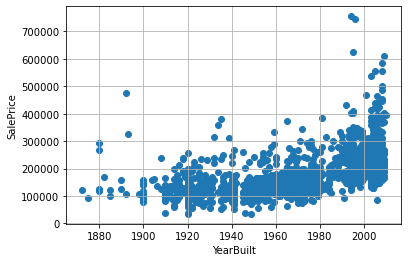

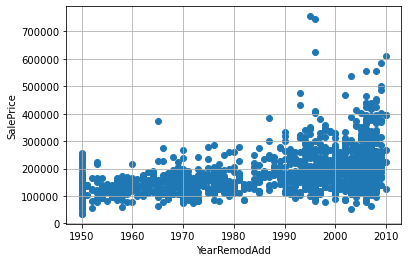

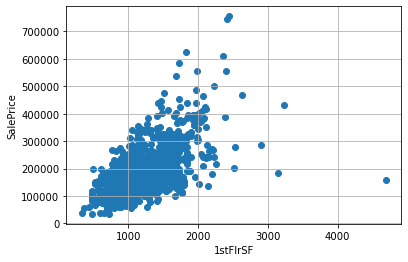

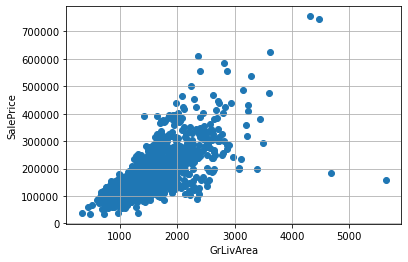

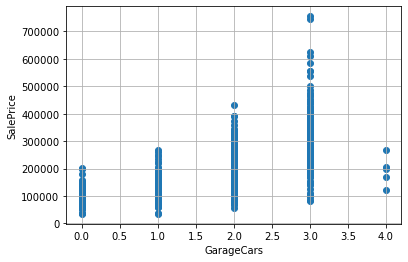

In [418]:
suspectCols = ['YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'GarageCars']
for colName in suspectCols:
    showVarPricePlot(colName)

Deleting the most apparent outliers:

In [419]:
indices = df[((df['YearBuilt'] < 1900) & (df['SalePrice'] > 200000)) | (df['1stFlrSF'] > 4000) | (df['GrLivArea'] > 4000)].index
df.drop(indices, axis=0, inplace=True)

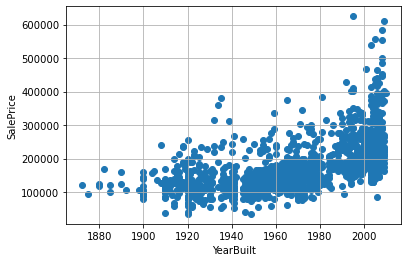

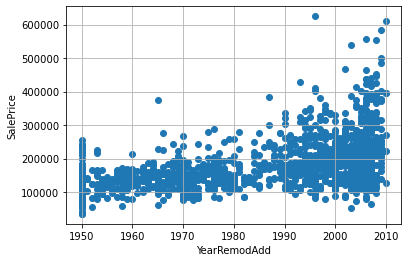

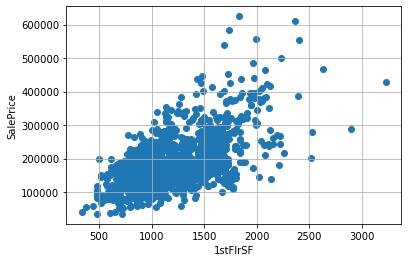

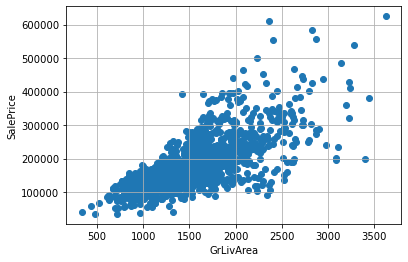

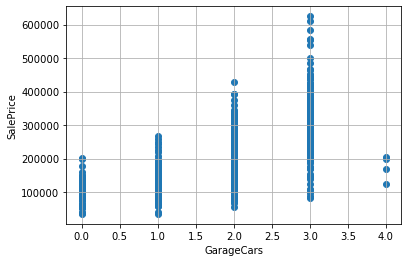

In [420]:
for colName in suspectCols:
    showVarPricePlot(colName)

Outliers done, let's take care of missing values now.

In [421]:
total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

              Total   Percent
PoolQC         1447  0.996556
MiscFeature    1398  0.962810
Alley          1362  0.938017
Fence          1173  0.807851
FireplaceQu     690  0.475207
GarageFinish     81  0.055785
GarageType       81  0.055785
GarageCond       81  0.055785
GarageQual       81  0.055785
BsmtExposure     38  0.026171
BsmtFinType2     38  0.026171
BsmtCond         37  0.025482
BsmtFinType1     37  0.025482
BsmtQual         37  0.025482
MasVnrType        8  0.005510
Electrical        1  0.000689
BldgType          0  0.000000
YearBuilt         0  0.000000
OverallCond       0  0.000000
OverallQual       0  0.000000


Garage... and Bsmt... are correlated with features I have already used so this columns can be unproblematically deleted.

In [422]:
df['PoolQC'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['Electrical'].fillna('SBrkr', inplace=True)

In [423]:
total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

              Total   Percent
Alley          1362  0.938017
GarageQual       81  0.055785
GarageCond       81  0.055785
GarageType       81  0.055785
GarageFinish     81  0.055785
BsmtFinType2     38  0.026171
BsmtExposure     38  0.026171
BsmtFinType1     37  0.025482
BsmtQual         37  0.025482
BsmtCond         37  0.025482
HouseStyle        0  0.000000
RoofStyle         0  0.000000
RoofMatl          0  0.000000
Exterior1st       0  0.000000
YearRemodAdd      0  0.000000
YearBuilt         0  0.000000
OverallCond       0  0.000000
OverallQual       0  0.000000
Condition1        0  0.000000
BldgType          0  0.000000


In [424]:
indices_to_delete = missing_data[missing_data['Total'] > 1].index
df.drop(indices_to_delete, axis=1, inplace=True)
print(df.isnull().sum())

Id               0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageCars       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64


In [425]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1452 non-null   int64 
 1   MSZoning       1452 non-null   object
 2   Street         1452 non-null   object
 3   LotShape       1452 non-null   object
 4   LandContour    1452 non-null   object
 5   Utilities      1452 non-null   object
 6   LotConfig      1452 non-null   object
 7   LandSlope      1452 non-null   object
 8   Neighborhood   1452 non-null   object
 9   Condition1     1452 non-null   object
 10  Condition2     1452 non-null   object
 11  BldgType       1452 non-null   object
 12  HouseStyle     1452 non-null   object
 13  OverallQual    1452 non-null   int64 
 14  OverallCond    1452 non-null   int64 
 15  YearBuilt      1452 non-null   int64 
 16  YearRemodAdd   1452 non-null   int64 
 17  RoofStyle      1452 non-null   object
 18  RoofMatl       1452 non-null

In [426]:
df_test['Utilities'].fillna('AllPub', inplace=True)
df_test['GarageCars'].fillna(2, inplace=True)
df_test['MSZoning'].fillna('RL', inplace=True)
df_test['PoolQC'].fillna('None', inplace=True)

In [427]:
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1452 non-null   int64 
 1   MSZoning       1452 non-null   object
 2   Street         1452 non-null   object
 3   LotShape       1452 non-null   object
 4   LandContour    1452 non-null   object
 5   Utilities      1452 non-null   object
 6   LotConfig      1452 non-null   object
 7   LandSlope      1452 non-null   object
 8   Neighborhood   1452 non-null   object
 9   Condition1     1452 non-null   object
 10  Condition2     1452 non-null   object
 11  BldgType       1452 non-null   object
 12  HouseStyle     1452 non-null   object
 13  OverallQual    1452 non-null   int64 
 14  OverallCond    1452 non-null   int64 
 15  YearBuilt      1452 non-null   int64 
 16  YearRemodAdd   1452 non-null   int64 
 17  RoofStyle      1452 non-null   object
 18  RoofMatl       1452 non-null

Finding object columns with meaningful correlation with SalePrice by label encoding them and treating like number ones.

In [428]:
df1 = df

In [429]:
object_cols = list(df1.select_dtypes(['object']).columns)
print(object_cols)

for col in object_cols: 
    df1[col] = le.fit_transform(df1[col])

print(df1.info())

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1452 non-null   int64
 1   MSZoning       1452 non-null   int64
 2   Street         1452 non-null   int64
 3   LotShape       1452 non-null   int64
 4   LandContour    1452 non-null   int64
 5   Utilities      1452 non-null   int64
 6   LotConfig      1452 non-null   int64
 7   LandSlope      1452 non-null   int64
 8   Neighborhood   1452 non-nul

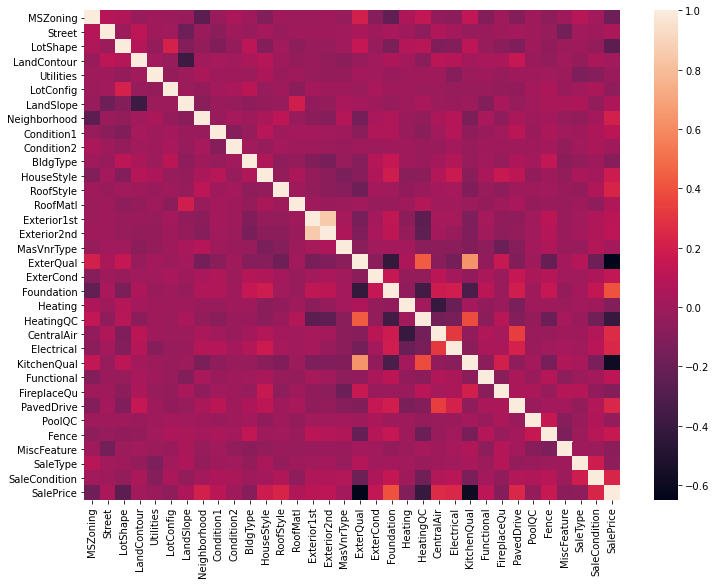

In [430]:
corrmat = pd.concat([df1[object_cols], df1['SalePrice']], axis = 1).corr() 
plt.subplots(figsize=(12, 9)) 
sns.heatmap(corrmat) 
plt.show()

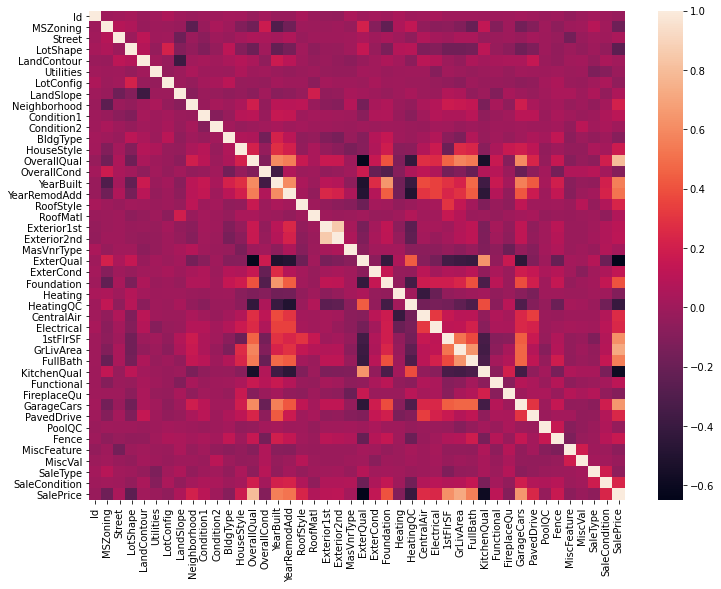

In [431]:
corrmat = df1.corr() 
plt.subplots(figsize=(12, 9)) 
sns.heatmap(corrmat) 
plt.show()

In [432]:
corrmat = df1.corr()
low_corrmat = corrmat[(corrmat['SalePrice'] > -0.2) & (corrmat['SalePrice'] < 0.5)] 
low_corrmat.drop(['Id'], inplace=True) 
low_corrmat_list = list(low_corrmat.index) 
print(low_corrmat_list) 
to_remove = ['MSZoning', 'LandContour', 'Utilities', 'Neighborhood', 'HouseStyle', 'OverallCond', 'ExterCond', 'CentralAir', 'PoolQC', 'MiscVal'] 
for col in to_remove: 
    low_corrmat_list.remove(col) 
    print(low_corrmat_list)
df.drop(columns=low_corrmat_list, inplace=True) 
df1.info()

['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']
['Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']
['Street', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior

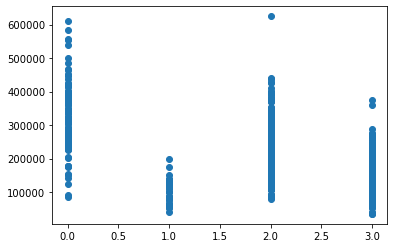

In [433]:
plt.scatter(x=df1['KitchenQual'], y=df1['SalePrice']) 
plt.show()

In [434]:
df1.drop(['KitchenQual'], axis=1, inplace=True) 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1452 non-null   int64
 1   MSZoning      1452 non-null   int64
 2   LotShape      1452 non-null   int64
 3   LandContour   1452 non-null   int64
 4   Utilities     1452 non-null   int64
 5   Neighborhood  1452 non-null   int64
 6   HouseStyle    1452 non-null   int64
 7   OverallQual   1452 non-null   int64
 8   OverallCond   1452 non-null   int64
 9   YearBuilt     1452 non-null   int64
 10  YearRemodAdd  1452 non-null   int64
 11  ExterQual     1452 non-null   int64
 12  ExterCond     1452 non-null   int64
 13  HeatingQC     1452 non-null   int64
 14  CentralAir    1452 non-null   int64
 15  1stFlrSF      1452 non-null   int64
 16  GrLivArea     1452 non-null   int64
 17  FullBath      1452 non-null   int64
 18  GarageCars    1452 non-null   int64
 19  PoolQC        1452 non-null

In [435]:
cols = list(df1.columns) 
cols.remove('SalePrice')
print(cols)

['Id', 'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'PoolQC', 'MiscVal']


In [436]:
def common_part(a, b): 
    a_set = set(a) 
    b_set = set(b)

    if(a_set & b_set):
        return list(a_set & b_set)
    else:
        print('no commons')

In [437]:
print(object_cols) 
new_object_cols = common_part(object_cols, df1.columns) 
print('Object columns to leave:', new_object_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Object columns to leave: ['ExterQual', 'PoolQC', 'HeatingQC', 'MSZoning', 'Neighborhood', 'LandContour', 'LotShape', 'HouseStyle', 'ExterCond', 'CentralAir', 'Utilities']


In [438]:
y = df.SalePrice.values
left_cols = ['Id', 'MSZoning', 'LotShape', 'LandContour', 'Utilities',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'PoolQC', 'MiscVal']
df = df[left_cols]
df_test = df_test[left_cols]
ntrain = df.shape[0]
ntest = df_test.shape[0]
all_data = pd.concat((df, df_test)).reset_index(drop=True)

mapping = {
    'Utilities': {'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3},
    'ExterQual': {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'ExterCond': {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'HeatingQC': {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'CentralAir': {'N':0, 'Y':1},
    'PoolQC': {'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
}

all_data = all_data.replace(mapping)

all_data['GarageCars'] = all_data['GarageCars'].astype('int')

all_data = pd.get_dummies(all_data)

df = all_data[:ntrain]
df_test = all_data[ntrain:]

df.drop(['Id'], axis=1, inplace=True)
df_test.reset_index(inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)
df_test.drop(['index'], axis=1, inplace=True)

print(df.info())
print(df_test.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 106 entries, Utilities to HouseStyle_SLvl
dtypes: int64(15), uint8(91)
memory usage: 299.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 106 entries, Utilities to HouseStyle_SLvl
dtypes: int64(15), uint8(91)
memory usage: 300.8 KB
None
[208500 181500 223500 ... 266500 142125 147500]


Testing few regression models with and tuning their parameters to see how do they work and choose most appropriate one.

In [439]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=0)

In [440]:
def show_accuracy(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(np.sqrt(mean_squared_error(pred, y_test)))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print(scores.mean())

In [441]:
def show_accuracy_scaled(model):
    steps = [('scaler', StandardScaler()),
            ('model', model)]
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)
    print(np.sqrt(mean_squared_error(pred, y_test)))
    scores = cross_val_score(pipeline, X_test, y_test, cv=5)
    print(scores.mean())

In [442]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=True)
show_accuracy(model)

31665.481566529514
-5.057775751193136e+25


In [443]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=True)
show_accuracy_scaled(model)

31715.262451089795
-7.084483914778291e+24


In [444]:
from sklearn.linear_model import LassoCV
model = LassoCV()
show_accuracy(model)

42136.36799119564
0.7560513174381557


In [445]:
from sklearn.linear_model import LassoCV
model = LassoCV()
show_accuracy_scaled(model)

31932.54369141025
0.841057014423147


In [446]:
from sklearn.linear_model import Lasso
model = Lasso()
show_accuracy(model)

31729.80569837633
0.8247658585701465


In [447]:
from sklearn.linear_model import Lasso
model = Lasso()
show_accuracy_scaled(model)

31731.924544350113
0.8244926412406638


In [448]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

params = {'alpha': [0.000001, 0.1, 0.25, 0.5, 0.75, 1, 10, 20, 30, 40, 50, 100]}
model = Lasso()
grid = GridSearchCV(model, params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8439594299958024
{'alpha': 50}


In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

params = {'model__alpha': [0.000001, 0.1, 0.25, 0.5, 0.75, 1, 10, 20, 30, 40, 50, 100]}
model = Lasso()
steps = [('scaler', StandardScaler()),
            ('model', model)]
pipeline = Pipeline(steps)
grid = GridSearchCV(pipeline, params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8432819120678232
{'model__alpha': 100}


In [450]:
from sklearn.linear_model import Ridge
model = Ridge()
show_accuracy(model)

31703.5086490709
0.8334930377581504


In [451]:
from sklearn.linear_model import Ridge
model = Ridge()
show_accuracy_scaled(model)

31732.468721974215
0.8254751267247595


In [452]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(cv = 5 ,random_state=0)
show_accuracy(model)

51582.93103697913
0.6527305055491494


In [453]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(cv = 5 ,random_state=0)
show_accuracy_scaled(model)

78728.49034761506
0.12160872724757951


In [454]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()
show_accuracy(model)

31819.624606179357
0.8403297823068172


In [455]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=[0.000001, 0.1, 0.25, 0.5, 0.75, 1, 10, 20, 30])
show_accuracy_scaled(model)

31862.909765612392
0.8329711393408663


In [456]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=[0.000001, 0.1, 0.25, 0.5, 0.75, 1, 10, 20, 30])
show_accuracy(model)
model.get_params()

31819.624606179357
0.8403297823068172


{'alphas': array([1.0e-06, 1.0e-01, 2.5e-01, 5.0e-01, 7.5e-01, 1.0e+00, 1.0e+01,
        2.0e+01, 3.0e+01]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}

In [457]:
from sklearn.linear_model import Ridge
final_model = Ridge(alpha=10)
show_accuracy(model)

31819.624606179357
0.8403297823068172


In [458]:
final_model.fit(df, y)

Ridge(alpha=10)

Creating prediction

In [459]:
pred = model.predict(df_test)
print(pred)

[116119.86359821 152193.09241031 167674.0840044  ... 158539.6190485
 118525.85805015 219513.90978106]


Exporting result to csv file

In [460]:
my_submission = pd.DataFrame({'Id': df_test.index + 1461, 'SalePrice': pred})
print(my_submission)
my_submission.to_csv('submission.csv', index=False)

        Id      SalePrice
0     1461  116119.863598
1     1462  152193.092410
2     1463  167674.084004
3     1464  185113.085386
4     1465  173511.009070
...    ...            ...
1454  2915  106603.800174
1455  2916  100922.061193
1456  2917  158539.619049
1457  2918  118525.858050
1458  2919  219513.909781

[1459 rows x 2 columns]
